# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# you need to do an API call using the lat and longitude because that is what you are given. 
# Here is the beggining of the API call:   

#Base URL shown on website
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

#Create list for City which will be used for the loop
city_id = [x for x in range(len(cities))]




In [10]:
# Create lists to hold information for each city. These are the columns shown in the table for the solution.

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind_speed = []


In [12]:
#Create a loop to loop through each city
#for city in cities:
    #target_url = {base_url + city + "&appid=" + weather_api_key}
    #response = requests.get(target_url)
    #response_json = response.json()
    
print("Beginning Data Retrieval")     
print("-----------------------------")
for city in cities:
    response = requests.get(base_url + city + "&appid=" + weather_api_key + "&units=" + units).json()
    
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {cities.index(city) + 1} | {city.title()}")
    except:
        print("City not found. Skipping...")
    time.sleep(2)

                                
#try to print the json

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 2 | Hobart
Processing Record 3 | Dunedin
Processing Record 4 | Khatanga
Processing Record 5 | Maun
City not found. Skipping...
Processing Record 7 | Kapaa
Processing Record 8 | Biltine
Processing Record 9 | Poum
Processing Record 10 | College
Processing Record 11 | Butaritari
Processing Record 12 | Longyearbyen
Processing Record 13 | Najran
Processing Record 14 | Faanui
Processing Record 15 | Punta Arenas
Processing Record 16 | Saint-Philippe
Processing Record 17 | Port Macquarie
Processing Record 18 | Leningradskiy
Processing Record 19 | Arraial Do Cabo
City not found. Skipping...
Processing Record 21 | Whitehorse
Processing Record 22 | Nouadhibou
Processing Record 23 | Atuona
Processing Record 24 | Ucluelet
Processing Record 25 | Klaksvik
Processing Record 26 | Karratha
Processing Record 27 | Mar Del Plata
Processing Record 28 | Lorengau
Processing Record 29 | Bengkulu
Processing Reco

Processing Record 252 | Bubaque
Processing Record 253 | Ornskoldsvik
Processing Record 254 | Lake Havasu City
Processing Record 255 | Umm Kaddadah
Processing Record 256 | Benjamin Constant
Processing Record 257 | Beyneu
Processing Record 258 | Dong Hoi
Processing Record 259 | Okhotsk
Processing Record 260 | Feltre
Processing Record 261 | Saint George
Processing Record 262 | Persianovskiy
Processing Record 263 | Matay
Processing Record 264 | Suffolk
Processing Record 265 | Westport
Processing Record 266 | Ocotlan
Processing Record 267 | Port Augusta
City not found. Skipping...
City not found. Skipping...
Processing Record 270 | Tambovka
Processing Record 271 | Victoria
Processing Record 272 | Half Moon Bay
Processing Record 273 | Orda
Processing Record 274 | Eganville
Processing Record 275 | Trebukhiv
Processing Record 276 | Panguna
Processing Record 277 | Srednekolymsk
Processing Record 278 | Ponta Do Sol
Processing Record 279 | Tezu
Processing Record 280 | Dubbo
Processing Record 281 

Processing Record 501 | Tianpeng
City not found. Skipping...
Processing Record 503 | Ouadda
Processing Record 504 | Emerald
Processing Record 505 | Manta
Processing Record 506 | Tura
Processing Record 507 | Phan Thiet
Processing Record 508 | Lupiro
Processing Record 509 | Juneau
Processing Record 510 | Cam Ranh
Processing Record 511 | Broome
City not found. Skipping...
Processing Record 513 | Puerto Escondido
Processing Record 514 | Biu
Processing Record 515 | Port Blair
Processing Record 516 | Kailua
Processing Record 517 | Porto Novo
Processing Record 518 | Omboue
Processing Record 519 | San Pedro
Processing Record 520 | Camana
Processing Record 521 | Maragogi
City not found. Skipping...
Processing Record 523 | Baruun-Urt
Processing Record 524 | Alta Floresta
Processing Record 525 | Kalinovskaya
Processing Record 526 | Sola
Processing Record 527 | Oranjemund
Processing Record 528 | Vestmannaeyjar
Processing Record 529 | Palu
Processing Record 530 | Boke
Processing Record 531 | Baykit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
#Dependencies to export the above to csv.file
import os
import csv

In [42]:
#use zip function to pair each list together
raw_data_csv = zip(city_id, cities, cloudiness, country, date, humidity, lat, lng, temp, wind_speed)

In [43]:
# Path for the new file
output_data_file = os.path.join("cities.csv")

In [44]:

with open(output_data_file, "w") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["City_ID", "City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
    csv_writer.writerows(raw_data_csv)

In [88]:
city_weather = pd.read_csv(output_data_file)
city_weather_df = city_weather[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
city_weather_df.head(30)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,umzimvubu,-42.88,147.33,66.20,59,75,18.34,AU,1602723909
1,hobart,-45.87,170.50,46.99,61,0,18.99,NZ,1602724135
2,dunedin,71.97,102.50,18.07,97,100,11.50,RU,1602723726
3,khatanga,-19.98,23.42,77.00,44,2,20.80,BW,1602724136
4,maun,22.08,-159.32,84.20,66,40,11.41,US,1602724136
5,warqla,14.53,20.92,84.11,17,92,8.12,TD,1602724136
6,kapaa,-20.23,164.02,75.56,81,100,5.79,NC,1602724136
7,biltine,64.86,-147.80,26.60,68,90,4.70,US,1602724136
8,poum,3.07,172.79,82.13,75,80,10.96,KI,1602724136
9,college,78.22,15.64,28.40,79,75,3.36,SJ,1602724136


In [54]:
city_weather_df.nunique()

City          573
Lat           555
Lng           564
Max Temp      338
Humidity       87
Cloudiness     79
Wind Speed    288
Country       116
Date          386
dtype: int64

In [47]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.00000,573.000000,573.000000,5.730000e+02
mean,19.393839,14.989197,62.574625,71.30192,48.954625,8.252443,1.602725e+09
std,32.632517,94.339333,18.703902,21.76354,40.638282,5.592090,5.361597e+02
min,-54.800000,-179.170000,12.540000,1.00000,0.000000,0.290000,1.602724e+09
25%,-6.550000,-70.760000,48.200000,61.00000,1.000000,3.360000,1.602724e+09
50%,22.170000,19.770000,66.990000,77.00000,40.000000,7.180000,1.602725e+09
75%,45.900000,104.180000,78.800000,87.00000,92.000000,11.410000,1.602725e+09
max,78.220000,179.320000,100.400000,100.00000,100.000000,30.290000,1.602726e+09


In [55]:
#Use the count function to get the total count for each field and look for miscellaneous values.
city_weather_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       568
Date          573
dtype: int64

In [79]:
#Use drop function to drop rows that are missing data: dropna(inplace=True)
city_weather_df.dropna(inplace=True)
city_weather_df.count()

C:\Users\Scott Proveucher\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [80]:
#Use nunuique function and compare to the nunique above to see the change after dropping rows.
city_weather_df.nunique()

City          568
Lat           550
Lng           559
Max Temp      335
Humidity       87
Cloudiness     79
Wind Speed    285
Country       116
Date          383
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [85]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df.loc[city_weather_df["Humidity"]>=100].index

Int64Index([ 28,  76, 110, 127, 169, 178, 198, 233, 270, 287, 305, 306, 317,
            359, 367, 368, 406, 443, 567],
           dtype='int64')

In [87]:
#Put the list of indicies into a list.
to_be_dropped = city_weather_df.loc[city_weather_df["Humidity"]>=100].index
to_be_dropped

Int64Index([ 28,  76, 110, 127, 169, 178, 198, 233, 270, 287, 305, 306, 317,
            359, 367, 368, 406, 443, 567],
           dtype='int64')

In [99]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Use the dropna function

clean_city_data = city_weat.drop((to_be_dropped), inplace=False)
clean_city_data.head(30)
#City ID 28 was dropped, looks correct.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,umzimvubu,-42.88,147.33,66.20,59,75,18.34,AU,1602723909
1,hobart,-45.87,170.50,46.99,61,0,18.99,NZ,1602724135
2,dunedin,71.97,102.50,18.07,97,100,11.50,RU,1602723726
3,khatanga,-19.98,23.42,77.00,44,2,20.80,BW,1602724136
4,maun,22.08,-159.32,84.20,66,40,11.41,US,1602724136
5,warqla,14.53,20.92,84.11,17,92,8.12,TD,1602724136
6,kapaa,-20.23,164.02,75.56,81,100,5.79,NC,1602724136
7,biltine,64.86,-147.80,26.60,68,90,4.70,US,1602724136
8,poum,3.07,172.79,82.13,75,80,10.96,KI,1602724136
9,college,78.22,15.64,28.40,79,75,3.36,SJ,1602724136


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [172]:
from scipy import stats

## Latitude vs. Temperature Plot

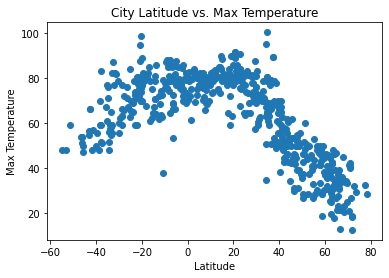

In [173]:
#Set variables
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
#Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")
#Save the .png image
plt.savefig("City Latitude vs. Max Temperature.png")
#Show Plot
plt.show()



In [182]:
#what is the correlation between the two variables
lat = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
correlation = stats.pearsonr(lat, max_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#what is this plot analyzing
"Each point on the plot represents a city's temperature in relation to their geographic latitude. Cities at latitude 0 or closer to 0 have a higher temperature. There is a negative relationship between latitude and Max Temp."


The correlation between both factors is -0.6


"Each point on the plot represents a city's temperature in relation to their geographic latitude. Cities at latitude 0 or closer to 0 have a higher temperature. There is a negative relationship between latitude and Max Temp."

## Latitude vs. Humidity Plot

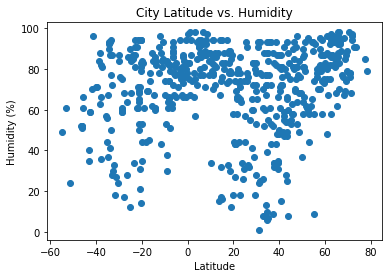

In [181]:
#Set variables
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]
#Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
#Save the .png image
plt.savefig("City Latitude vs. Humidity.png")
#Show Plot
plt.show()


In [183]:
#what is the correlation between the two variables
lat = clean_city_data["Lat"]
humidity = clean_city_data["Humidity"]
correlation = stats.pearsonr(lat, humidity)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#what is this plot analyzing
"Each point on the plot represents a city's humidity level in relation to their geographic latitude. Cities at a higher latitude with a higher humidity level tend to be clustered to the top right of the plot. There is a positive relationship between latitude and Humidity."


The correlation between both factors is 0.14


"Each point on the plot represents a city's humidity level in relation to their geographic latitude. Cities at a higher latitude with a higher humidity level tend to be clustered to the top right of the plot. There is a positive relationship between latitude and Humidity."

## Latitude vs. Cloudiness Plot

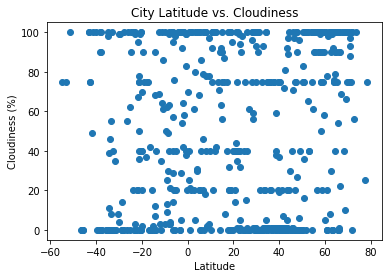

In [156]:
#Set variables
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]
#Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
#Save the .png image
plt.savefig("City Latitude vs. Cloudiness.png")
#Show Plot
plt.show()

In [186]:
#what is this plot analyzing
#what is the correlation between the two variables
lat = clean_city_data["Lat"]
cloudiness = clean_city_data["Cloudiness"]
correlation = stats.pearsonr(lat, cloudiness)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#what is this plot analyzing
"Each point on the plot represents a city's cloudiness in relation to their geographic latitude. There is a positive relationship between latitude and cloudiness."


The correlation between both factors is 0.11


"Each point on the plot represents a city's cloudiness in relation to their geographic latitude. There is a positive relationship between latitude and cloudiness."

## Latitude vs. Wind Speed Plot

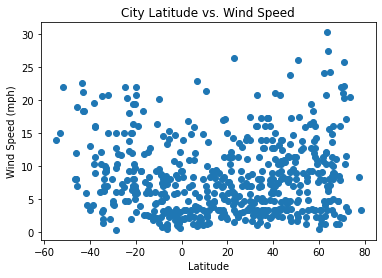

In [159]:
#Set variables
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]
#Plot scatter plot
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
#Save the .png image
plt.savefig("City Latitude vs. Cloudiness.png")
#Show Plot
plt.show()


In [192]:
#what is the correlation between the two variables
lat = clean_city_data["Lat"]
wind_speed = clean_city_data["Wind Speed"]
correlation = stats.pearsonr(lat, wind_speed)
print(f"The correlation between both factors is {round(correlation[0],2)}")
#what is this plot analyzing
"Each point on the plot represents a city's wind speed in relation to their geographic latitude. There is hardly a correlation between latitude and wind speed but, it is positive."


The correlation between both factors is 0.02


"Each point on the plot represents a city's wind speed in relation to their geographic latitude. There is hardly a correlation between latitude and wind speed but, it is positive."

## Linear Regression

In [190]:
#Need to create a dateframe for cities located in Northern Hemisphere
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"]>=0.0]
northern_hemisphere.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,dunedin,71.97,102.50,18.07,97,100,11.50,RU,1602723726
4,maun,22.08,-159.32,84.20,66,40,11.41,US,1602724136
5,warqla,14.53,20.92,84.11,17,92,8.12,TD,1602724136
7,biltine,64.86,-147.80,26.60,68,90,4.70,US,1602724136
8,poum,3.07,172.79,82.13,75,80,10.96,KI,1602724136
9,college,78.22,15.64,28.40,79,75,3.36,SJ,1602724136
10,butaritari,17.49,44.13,64.40,33,0,2.39,SA,1602724061
15,saint-philippe,69.38,178.42,34.18,87,100,7.83,RU,1602724137
17,leningradskiy,60.72,-135.05,41.00,48,20,2.24,CA,1602723884
18,arraial do cabo,20.93,-17.03,78.80,69,44,11.41,MR,1602724138


In [191]:
#Need to create a dateframe for cities located in Southern Hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"]<=0.0]
southern_hemisphere.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,umzimvubu,-42.88,147.33,66.20,59,75,18.34,AU,1602723909
1,hobart,-45.87,170.50,46.99,61,0,18.99,NZ,1602724135
3,khatanga,-19.98,23.42,77.00,44,2,20.80,BW,1602724136
6,kapaa,-20.23,164.02,75.56,81,100,5.79,NC,1602724136
11,longyearbyen,-16.48,-151.75,78.94,78,0,11.83,PF,1602724137
12,najran,-53.15,-70.92,48.20,61,75,14.99,CL,1602724137
13,faanui,-21.36,55.77,73.40,64,75,6.93,RE,1602724137
14,punta arenas,-31.43,152.92,82.00,27,0,1.99,AU,1602724137
16,port macquarie,-22.97,-42.03,72.48,94,3,12.30,BR,1602724137
19,barentsburg,-9.80,-139.03,77.94,74,3,20.11,PF,1602724138


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

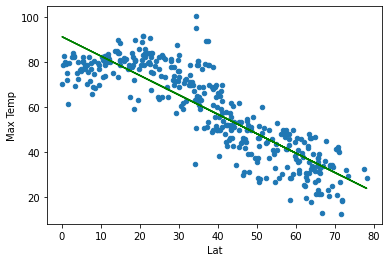

y = -0.86x + 91.31
The r-value is: -0.865922352195753


<Figure size 432x288 with 0 Axes>

In [198]:
#Create the variables for the scatterplot as data frames
latitude_northern = northern_hemisphere["Lat"]
max_temp_northern = northern_hemisphere["Max Temp"]

#state the slope and intercept using stats regression formula
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude_northern, max_temp_northern)
regression_values = latitude_northern * slope + intercept
#plot scatter plot
northern_lat_vs_max_temp_scatter = northern_hemisphere.plot(kind='scatter', x="Lat", y = "Max Temp")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
northern_lat_vs_max_temp_scatter.plot(latitude_northern, regression_values, "g-")
plt.show()
plt.tight_layout()

print(line_eq)
print(f"The r-value is: {rvalue}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

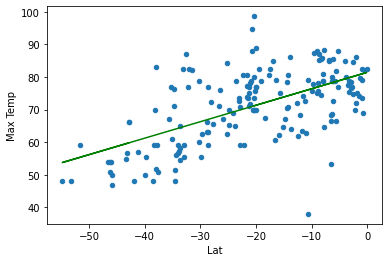

y = 0.5x + 81.42
The r-value is: 0.6006013544020549


<Figure size 432x288 with 0 Axes>

In [206]:
#Create the variables for the scatterplot as data frames
latitude_southern = southern_hemisphere["Lat"]
max_temp_southern = southern_hemisphere["Max Temp"]

#state the slope and intercept using stats regression formula
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude_southern, max_temp_southern)
regression_values = latitude_southern * slope + intercept
#plot scatter plot
southern_lat_vs_max_temp_scatter = southern_hemisphere.plot(kind='scatter', x="Lat", y = "Max Temp")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
southern_lat_vs_max_temp_scatter.plot(latitude_southern, regression_values, "g-")
plt.show()
plt.tight_layout()

print(line_eq)
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

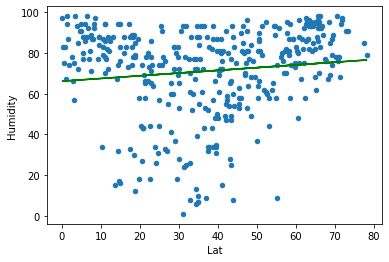

y = 0.13x + 66.13
The r-value is: 0.12150622108863235


<Figure size 432x288 with 0 Axes>

In [199]:
#Create the variables for the scatterplot as data frames
latitude_northern = northern_hemisphere["Lat"]
humidity_northern = northern_hemisphere["Humidity"]

#state the slope and intercept using stats regression formula
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude_northern, humidity_northern)
regression_values = latitude_northern * slope + intercept
#plot scatter plot
northern_lat_vs_humidity_scatter = northern_hemisphere.plot(kind='scatter', x="Lat", y = "Humidity")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
northern_lat_vs_humidity_scatter.plot(latitude_northern, regression_values, "g-")
plt.show()
plt.tight_layout()

print(line_eq)
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

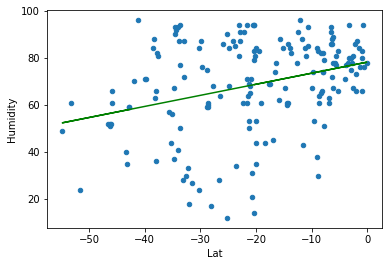

y = 0.47x + 78.21
The r-value is: 0.3197930304907069


<Figure size 432x288 with 0 Axes>

In [207]:
#Create the variables for the scatterplot as data frames
latitude_southern = southern_hemisphere["Lat"]
humidity_southern = southern_hemisphere["Humidity"]

#state the slope and intercept using stats regression formula
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude_southern, humidity_southern)
regression_values = latitude_southern * slope + intercept
#plot scatter plot
southern_lat_vs_humidity_scatter = southern_hemisphere.plot(kind='scatter', x="Lat", y = "Humidity")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
southern_lat_vs_humidity_scatter.plot(latitude_southern, regression_values, "g-")
plt.show()
plt.tight_layout()

print(line_eq)
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

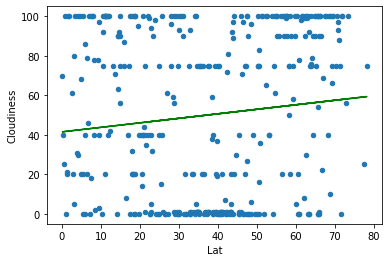

y = 0.23x + 41.52
The r-value is: 0.11203406468674547


<Figure size 432x288 with 0 Axes>

In [209]:
#Create the variables for the scatterplot as data frames
latitude_northern = northern_hemisphere["Lat"]
cloudiness_northern = northern_hemisphere["Cloudiness"]

#state the slope and intercept using stats regression formula
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude_northern, cloudiness_northern)
regression_values = latitude_northern * slope + intercept
#plot scatter plot
northern_lat_vs_cloudiness_scatter = northern_hemisphere.plot(kind='scatter', x="Lat", y = "Cloudiness")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
northern_lat_vs_cloudiness_scatter.plot(latitude_northern, regression_values, "g-")
plt.show()
plt.tight_layout()

print(line_eq)
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

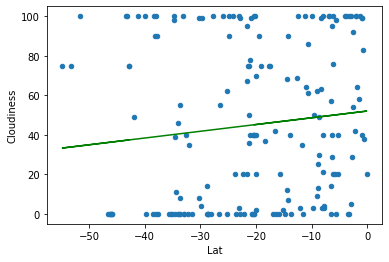

y = 0.34x + 52.05
The r-value is: 0.11569257142697814


<Figure size 432x288 with 0 Axes>

In [210]:
#Create the variables for the scatterplot as data frames
latitude_southern = southern_hemisphere["Lat"]
cloudiness_southern = southern_hemisphere["Cloudiness"]

#state the slope and intercept using stats regression formula
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude_southern, cloudiness_southern)
regression_values = latitude_southern * slope + intercept
#plot scatter plot
southern_lat_vs_cloudiness_scatter = southern_hemisphere.plot(kind='scatter', x="Lat", y = "Cloudiness")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
southern_lat_vs_cloudiness_scatter.plot(latitude_southern, regression_values, "g-")
plt.show()
plt.tight_layout()

print(line_eq)
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

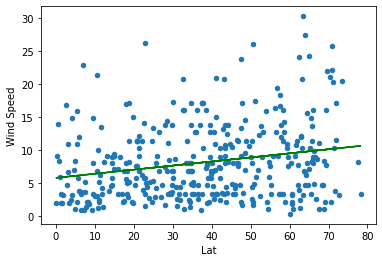

y = 0.06x + 5.84
The r-value is: 0.22207108792384253


<Figure size 432x288 with 0 Axes>

In [203]:
#Create the variables for the scatterplot as data frames
latitude_northern = northern_hemisphere["Lat"]
wind_speed_northern = northern_hemisphere["Wind Speed"]

#state the slope and intercept using stats regression formula
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude_northern, wind_speed_northern)
regression_values = latitude_northern * slope + intercept
#plot scatter plot
northern_lat_vs_wind_speed_scatter = northern_hemisphere.plot(kind='scatter', x="Lat", y = "Wind Speed")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
northern_lat_vs_wind_speed_scatter.plot(latitude_northern, regression_values, "g-")
plt.show()
plt.tight_layout()

print(line_eq)
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

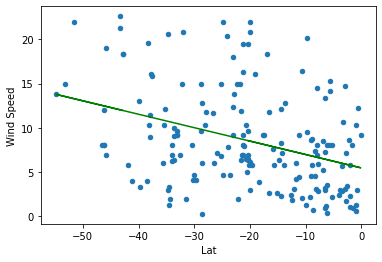

y = -0.15x + 5.48
The r-value is: -0.3659507344550937


<Figure size 432x288 with 0 Axes>

In [211]:
#Create the variables for the scatterplot as data frames
latitude_southern = southern_hemisphere["Lat"]
wind_speed_southern = southern_hemisphere["Wind Speed"]

#state the slope and intercept using stats regression formula
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(latitude_southern, wind_speed_southern)
regression_values = latitude_southern * slope + intercept
#plot scatter plot
southern_lat_vs_wind_speed_scatter = southern_hemisphere.plot(kind='scatter', x="Lat", y = "Wind Speed")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
southern_lat_vs_wind_speed_scatter.plot(latitude_southern, regression_values, "g-")
plt.show()
plt.tight_layout()

print(line_eq)
print(f"The r-value is: {rvalue}")